# Level 1

#### 1. Loading sample iris and digits data

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


#### 2. Example to create classification and train modelSupport Vector Classifications

In [2]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

# train the model using fit
clf.fit(digits.data[:-1], digits.target[:-1])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### 3. Use above model to predict the last value

In [3]:
clf.predict(digits.data[-1:])

array([8])

#### 4. Define how data looks like

In [4]:
print(iris.data.shape) #rows and colums in data
# print(iris.DESCR) commented the command as it provides lot more details

(150L, 4L)


In [5]:
# unique values in data
import numpy as np
iris_X = iris.data
iris_Y = iris.target

np.unique(iris_Y)

array([0, 1, 2])

#### 5. Load and train different types of models and compare their performance
        neighbour, linear regression, logistic regression 

In [6]:
#Example 1
from sklearn import linear_model, neighbors

d = datasets.load_diabetes()
d_X_train = d.data[:-20]
d_X_test = d.data[-20:]
d_Y_train = d.target[:-20]
d_Y_test = d.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(d_X_train, d_Y_train)
print(regr.score(d_X_test, d_Y_test))

knn = linear_model.Lasso()
knn.fit(d_X_train, d_Y_train)
print(knn.score(d_X_test, d_Y_test))


0.5850753022690571
0.3713190845037463


In [7]:
#Example 2
digits = datasets.load_digits()
X_digits = digits.data / digits.data.max()
y_digits = digits.target

sample = int(0.9*len(X_digits))

X_train = X_digits[:sample]
X_test = X_digits[sample:]
y_train = y_digits[:sample]
y_test = y_digits[sample:]

knn = neighbors.KNeighborsClassifier()
print(knn.fit(X_train, y_train).score(X_test, y_test))

linreg = linear_model.LinearRegression()
print(linreg.fit(X_train, y_train).score(X_test, y_test))

logreg = linear_model.LogisticRegression()
print(logreg.fit(X_train, y_train).score(X_test, y_test))

sdg = linear_model.SGDClassifier(max_iter=1000)
print(sdg.fit(X_train, y_train).score(X_test, y_test))

0.9611111111111111
0.40895560960777816
0.9166666666666666
0.9222222222222223


#### 6. Test performance for different learning rates

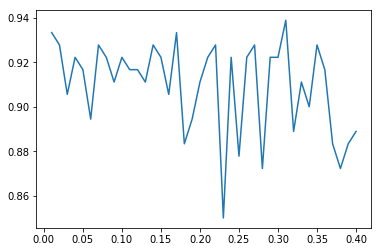

In [12]:
eta = []
scores = []

for i in range(1, 41):
    e = float(i)/100
    eta.append(e)
    sdg = linear_model.SGDClassifier(max_iter=50, learning_rate='constant', eta0=e)
    s = sdg.fit(X_train, y_train).score(X_test, y_test)
    scores.append(s)

import matplotlib.pyplot as plt
plt.plot(eta, scores)

# Level 2

#### 1. Plot performance when epoch changes

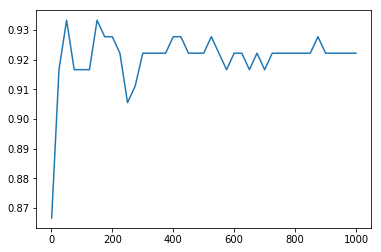

In [9]:
sdg = linear_model.SGDClassifier(max_iter=1, learning_rate='optimal')
s = sdg.fit(X_train, y_train).score(X_test, y_test)

epoch = [1]
scores = [s]

for i in range(1, 41):
    e = i*25
    epoch.append(e)
    sdg = linear_model.SGDClassifier(max_iter=e, learning_rate='optimal')
    s = sdg.fit(X_train, y_train).score(X_test, y_test)
    scores.append(s)

import matplotlib.pyplot as plt
plt.plot(epoch, scores)

#### 2. Implement cross-validations

In [10]:
#example 1
from sklearn.model_selection import KFold, cross_val_score

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

svc = svm.SVC(C=1, kernel='linear')
k_fold = KFold(n_splits=5)
cross_val_score(svc, X_digits, y_digits, cv=k_fold, scoring='precision_macro')



array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])

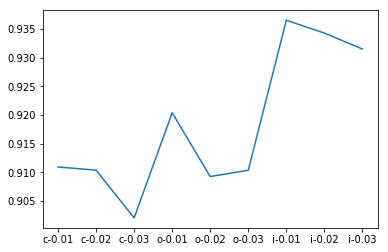

In [28]:
# Example 2 - cross validation to find out good learning rate for logistic regression(SDG classifier)
rates = ['constant', 'optimal', 'invscaling']
k_fold = KFold(n_splits=10)
cv_sum = []
re = []

for r in rates:
    for e in range(1,4):
        eta = float(e)/float(100)
        sdg = linear_model.SGDClassifier(max_iter=100, learning_rate=r, eta0=eta)
        cv = cross_val_score(sdg, X_digits, y_digits, cv=k_fold, n_jobs=-1)
        s = sum(cv)/float(len(cv))
        cv_sum.append(s)
        re.append(r[:1] + '-' + str(eta))
    
plt.plot(re, cv_sum)

#### 3. Implement decision tree